In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager

TARGET_FONT = 'Malgun Gothic'
mpl.rcParams['font.family'] = TARGET_FONT
mpl.rcParams['axes.unicode_minus'] = False

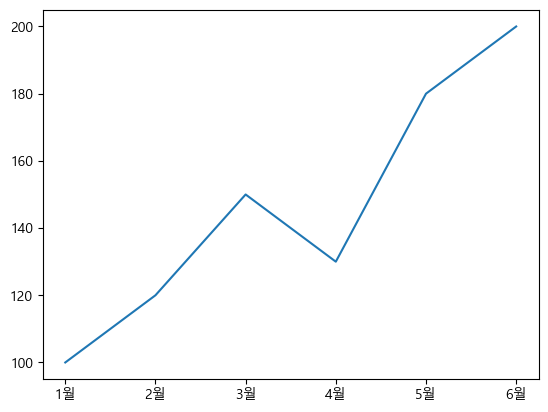

In [3]:
data = {'월': ['1월','2월','3월','4월','5월','6월'], '매출액':[100, 120, 150, 130, 180, 200]}

plt.plot(data['월'],data['매출액'])

plt.show()


In [5]:
import numpy as np
np.random.seed(0)
scores = np.random.randint(50, 101, size=30)
scores

array([ 94,  97,  50,  53,  53,  89,  59,  69,  71, 100,  86,  73,  56,
        74,  74,  62,  51,  88,  89,  73,  96,  74,  67,  87,  75,  63,
        58,  59,  70,  66], dtype=int32)

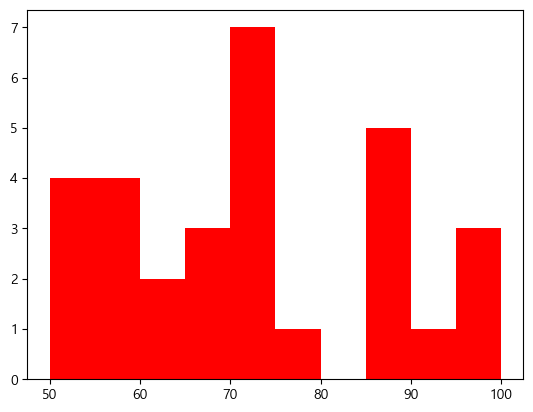

In [7]:
plt.hist(scores, color='red')
plt.show()

In [8]:
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
import numpy as np

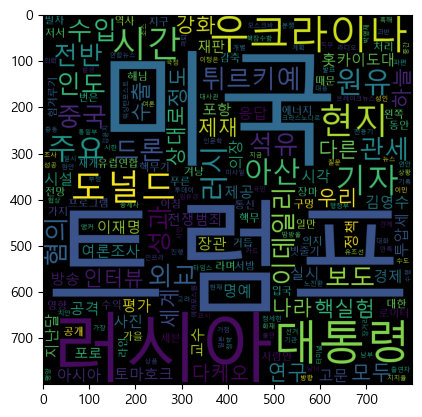

In [9]:
with open('우크라이나기사.txt', 'r', encoding='utf-8') as f: text = f.read()
okt = Okt()
nouns = okt.nouns(text)
words = [n for n in nouns if len(n)>1]
c = Counter(words)

#워드클라우드 생성하기
wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',\
	width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)

plt.figure()
plt.imshow(gen)
wc.to_file('우크라이나기사.png')


In [2]:
!pip install networkx
import networkx as nx

G = nx.DiGraph()
G.add_nodes_from(['A','B','C','D','E'])
G.add_edges_from([('A','B'), ('B','C'), ('C','D')])

nx.draw(G, with_labels=True)


TypeError: '_AxesStack' object is not callable

<Figure size 640x480 with 0 Axes>

In [3]:
!pip install apyori

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=6015 sha256=b5a0c735f94c214a0ea9822f604ebb3dc9e641b298a6b04efe0f2e88b5405d35
  Stored in directory: c:\users\kyungin\appdata\local\pip\cache\wheels\4d\9f\d0\7ba4ae3f5de2f76ea362170ea0f157e6cc1d1b9aea188175f2
Successfully built apyori


In [7]:
!pip install konlpy
!pip install networkx==2.7.1
!pip install kiwipiepy

     ---------------------------------------- 0.0/35.5 MB ? eta -:--:--
     -- ------------------------------------- 1.8/35.5 MB 12.4 MB/s eta 0:00:03
     ---- ----------------------------------- 4.2/35.5 MB 12.0 MB/s eta 0:00:03
     ------- -------------------------------- 7.1/35.5 MB 12.2 MB/s eta 0:00:03
     ---------- ----------------------------- 9.4/35.5 MB 12.2 MB/s eta 0:00:03
     ------------- ------------------------- 12.3/35.5 MB 12.4 MB/s eta 0:00:02
     ----------------- --------------------- 16.3/35.5 MB 13.3 MB/s eta 0:00:02
     ---------------------- ---------------- 20.4/35.5 MB 14.3 MB/s eta 0:00:02
     -------------------------- ------------ 24.4/35.5 MB 14.9 MB/s eta 0:00:01
     ----------------------------- --------- 27.3/35.5 MB 14.8 MB/s eta 0:00:01
     ---------------------------------- ---- 31.5/35.5 MB 15.3 MB/s eta 0:00:01
     ---------------------------------------- 35.5/35.5 MB 15.7 MB/s  0:00:02
  Installing build dependencies: started
  Install

In [ ]:
!pip install konlpy
!pip install networkx==2.7.1
!pip install kiwipiepy

In [8]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import networkx as nx
from kiwipiepy import Kiwi

kiwi = Kiwi()


In [9]:
f = open('튀르키예.csv', 'r', encoding='utf8')
lines = f.readlines()
#print(lines)
f.close()


In [10]:
dataset = []
for i in range(len(lines)):
    clean_line = re.sub(r'[^가-힣a-zA-Z\s]', '', lines[i])
    nouns = [token.form for token in kiwi.tokenize(clean_line) if token.tag.startswith('N')]
    dataset.append(nouns)
print(dataset[:3])


[['제목'], ['중남미', '화폐', '달러', '트럼프', '정부', '달러라이제이션', '실험'], ['정', '종암', '박사', '인문학', '산책에머랄드', '빛', '말']]


In [12]:
!pip install apyori
from apyori import apriori

#연관규칙 데이터프레임 생성하기
result = (list(apriori(dataset, min_support=0.01)))
df = pd.DataFrame(result)
#항목 수가 2인 것만 남기기
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length']==2)&(df['support']>=0.01)].sort_values(by='support',\
				     ascending=False)
df.head(3)


,items,support,ordered_statistics,length
114,"(트럼프, 평화)",0.028629,"[((), (트럼프, 평화), 0.028629395852119027, 1.0), (...",2
115,"(하마스, 트럼프)",0.022317,"[((), (하마스, 트럼프), 0.022317403065825067, 1.0), ...",2
107,"(이스라엘, 트럼프)",0.019612,"[((), (이스라엘, 트럼프), 0.019612263300270515, 1.0),...",2


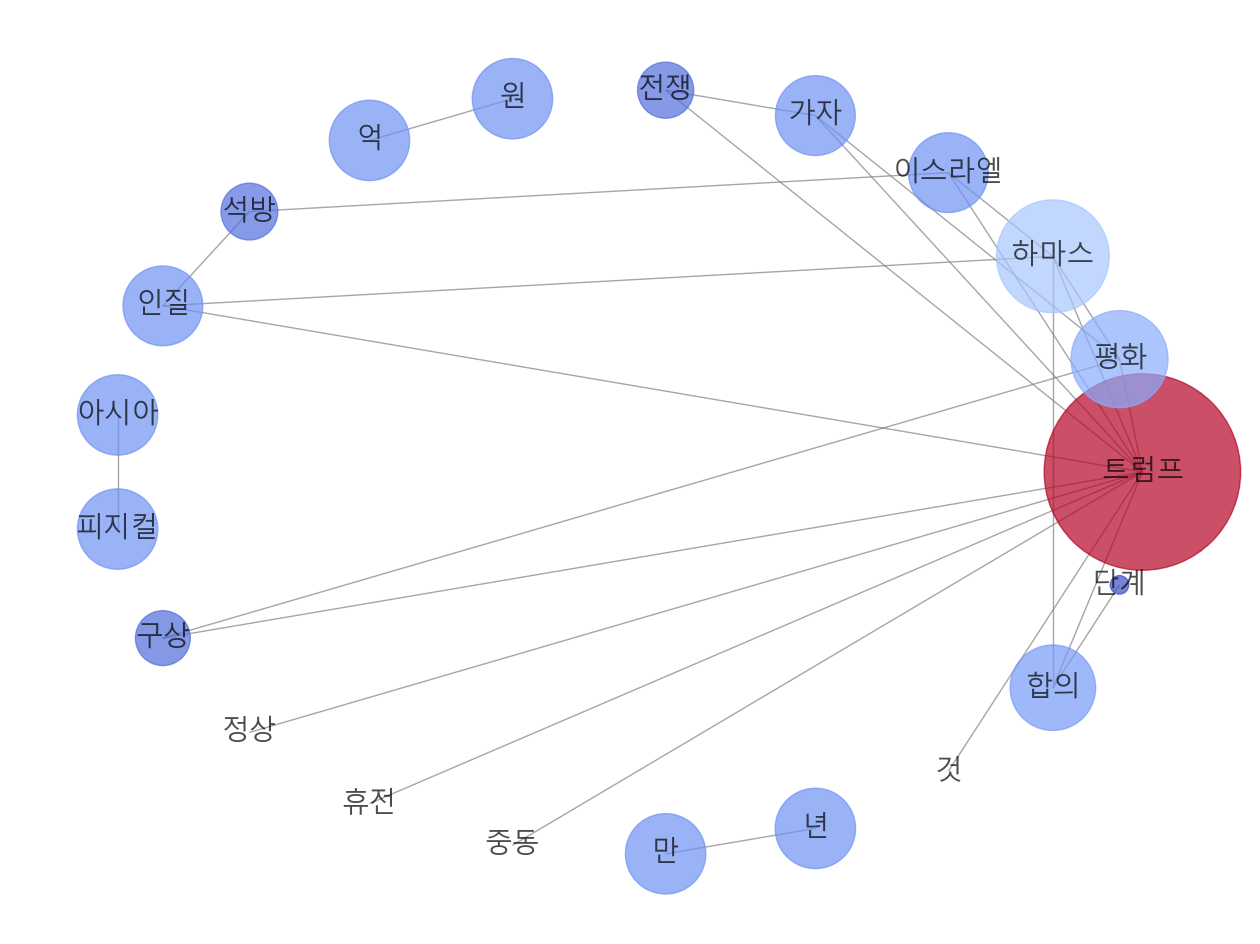

In [16]:
!pip install scipy
!pip install pyg-nightly

G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize-min(nsize)) / (max(nsize)-min(nsize))
pos = nx.circular_layout(G)
plt.figure(figsize=(16,12)); plt.axis('off')
nx.draw_networkx(G, font_family=TARGET_FONT, font_size=20, pos=pos,\
                 node_color=list(pr.values()), node_size=nsize*10, alpha=0.7,\
                 edge_color='.5', cmap=plt.cm.coolwarm)
plt.savefig('IMG.png', bbox_inches='tight')


In [14]:
!pip install scipy

   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.5 MB ? eta -:--:--
    --------------------------------------- 0.5/38.5 MB 1.2 MB/s eta 0:00:33
    --------------------------------------- 0.8/38.5 MB 1.2 MB/s eta 0:00:33
   - -------------------------------------- 1.3/38.5 MB 1.7 MB/s eta 0:00:22
   -- ------------------------------------- 2.1/38.5 MB 2.1 MB/s eta 0:00:18
   -- ------------------------------------- 2.6/38.5 MB 2.3 MB/s eta 0:00:16
   --- ------------------------------------ 3.7/38.5 MB 2.6 MB/s eta 0:00:14
   ---- ----------------------------------- 4.5/38.5 MB 2.8 MB/s eta 0:00:13
   ----- ---------------------------------- 5.5/38.5 MB 3.0 MB/s eta 0:00:11
   ------ --------------------------------- 6.3/38.5 MB 3.1 MB/s eta 0:00:11
   ------- -------------------------------- 7.1/38.5 MB 3.1 MB/s eta 0:00:11
   ------- -------------------------------- 7.6/38.5 MB 3.2 MB/s eta 0:00:10
   -------- -

In [17]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'A': [1, 2, np.nan, 4, 5],
'B': [6, 7, 8, np.nan, 10],
'C': [11, 12, 13, np.nan, np.nan]})
df

,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0
2,NaN,8.0,13.0
3,4.0,NaN,NaN
4,5.0,10.0,NaN


In [18]:
df_drop_nan = df.dropna( )
df_drop_nan

,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0


In [19]:
df['C']

0    11.0
1    12.0
2    13.0
3     NaN
4     NaN
Name: C, dtype: float64

In [25]:
df_0 = df['C'].fillna(2)


In [26]:
df_0

0    11.0
1    12.0
2    13.0
3     2.0
4     2.0
Name: C, dtype: float64

In [27]:
df_mean = df.fillna(df.mean( ))
print(df, '\n')
print(df_mean)


     A     B     C
0  1.0   6.0  11.0
1  2.0   7.0  12.0
2  NaN   8.0  13.0
3  4.0   NaN   NaN
4  5.0  10.0   NaN 

     A      B     C
0  1.0   6.00  11.0
1  2.0   7.00  12.0
2  3.0   8.00  13.0
3  4.0   7.75  12.0
4  5.0  10.00  12.0


In [29]:
print(df, '\n')
#결측치 바로 위의 값으로 대체하기
df_ffill = df.ffill()
print(df_ffill, '\n')
#결측치 바로 아래의 값으로 대체하기
df_bfill = df.bfill()
print(df_bfill)

     A     B     C
0  1.0   6.0  11.0
1  2.0   7.0  12.0
2  NaN   8.0  13.0
3  4.0   NaN   NaN
4  5.0  10.0   NaN 

     A     B     C
0  1.0   6.0  11.0
1  2.0   7.0  12.0
2  2.0   8.0  13.0
3  4.0   8.0  13.0
4  5.0  10.0  13.0 

     A     B     C
0  1.0   6.0  11.0
1  2.0   7.0  12.0
2  4.0   8.0  13.0
3  4.0  10.0   NaN
4  5.0  10.0   NaN


In [30]:
data = {'이름':['홍길동','이순신','강감찬','유관순'],
'나이':[25, None, 31, None],
'점수':[85, 90, None, 88]}
df = pd.DataFrame(data)

In [31]:
df

,이름,나이,점수
0,홍길동,25.0,85.0
1,이순신,NaN,90.0
2,강감찬,31.0,NaN
3,유관순,NaN,88.0


In [32]:
df['점수'].dropna()

0    85.0
1    90.0
3    88.0
Name: 점수, dtype: float64

In [40]:
#1. 위의 DataFrame에서 각 열의 결측치 개수를 출력하시오.
df.isna().sum()
#2. 위의 df에서 결측치가 하나라도 포함된 행을 모두 제거하시오.
df.dropna()
#3. 나이 열의 결측치를 해당 열의 평균값으로 채우시오.
df['나이'].mean()
df['나이'].fillna(df['나이'].mean())
#4. 결측치를 바로 위의 값으로 채우시오.
df.ffill()
#5. 점수가 결측치인 행만 제거하고, 다른 결측치는 유지하시오.
df.dropna(subset=['점수'])

,이름,나이,점수
0,홍길동,25.0,85.0
1,이순신,NaN,90.0
3,유관순,NaN,88.0
